# Hari 5: Korelasi dan Visualisasi Lanjutan

## Import Library yang Dibutuhkan

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

# Mengatur tampilan grafik
plt.style.use('seaborn-v0_8-whitegrid') # Menggunakan style yang tersedia
sns.set(font_scale=1.2)
plt.rcParams['figure.figsize'] = (12, 8)

# Mengabaikan warning
import warnings
warnings.filterwarnings('ignore')

## 1. Membuat Dataset Contoh

In [3]:
# Membuat dataset contoh dengan beberapa variabel numerik dan kategorikal
np.random.seed(42)
data = {
    'Usia': np.random.randint(20, 60, 100),
    'Pendapatan': np.random.normal(50000, 15000, 100).astype(int),
    'SkorKredit': np.random.randint(300, 850, 100),
    'JamBelajar': np.random.uniform(1, 10, 100),
    'NilaiUjian': 50 + 5 * np.random.uniform(1, 10, 100) + np.random.normal(0, 5, 100),
    'KepuasanPelanggan': np.random.randint(1, 6, 100), # Skala 1-5
    'ProdukDibeli': np.random.choice(['A', 'B', 'C', 'D'], 100)
}
df = pd.DataFrame(data)

# Menambahkan beberapa korelasi yang disengaja
df['Pengeluaran'] = df['Pendapatan'] * np.random.uniform(0.2, 0.6, 100) + np.random.normal(0, 5000, 100)
df['NilaiUjian'] = np.clip(df['NilaiUjian'], 0, 100) # Memastikan nilai ujian antara 0-100

print("Dataset Contoh - 5 Baris Pertama:")
display(df.head())

print("Informasi Dataset:")
df.info()

print("Statistik Deskriptif:")
display(df.describe())

Dataset Contoh - 5 Baris Pertama:


,Usia,Pendapatan,SkorKredit,JamBelajar,NilaiUjian,KepuasanPelanggan,ProdukDibeli,Pengeluaran
0,58,47334,719,3.443886,61.745683,4,D,24277.480407
1,48,43844,721,9.687266,78.903791,2,B,19799.333284
2,34,67695,403,5.115386,86.679030,4,D,20805.100099
3,27,36526,553,8.578208,57.420040,2,A,25386.599503
4,40,62521,526,2.749420,80.636538,5,C,32494.668621


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Usia               100 non-null    int32  
 1   Pendapatan         100 non-null    int64  
 2   SkorKredit         100 non-null    int32  
 3   JamBelajar         100 non-null    float64
 4   NilaiUjian         100 non-null    float64
 5   KepuasanPelanggan  100 non-null    int32  
 6   ProdukDibeli       100 non-null    object 
 7   Pengeluaran        100 non-null    float64
dtypes: float64(3), int32(3), int64(1), object(1)
memory usage: 5.2+ KB
Statistik Deskriptif:


,Usia,Pendapatan,SkorKredit,JamBelajar,NilaiUjian,KepuasanPelanggan,Pengeluaran
count,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000
mean,38.790000,51294.700000,568.82000,5.417679,78.330747,2.980000,21013.801093
std,11.556008,14509.820116,161.98537,2.611580,14.145221,1.363151,9153.923535
min,20.000000,10172.000000,316.00000,1.137741,47.855697,1.000000,1419.240661
25%,28.000000,43282.000000,432.25000,3.227133,65.313646,2.000000,14217.258711
50%,39.500000,49974.000000,569.50000,5.486848,78.857036,3.000000,20952.353757
75%,47.250000,61531.000000,701.75000,7.329546,90.798296,4.000000,26822.072612
max,59.000000,100584.000000,846.00000,9.815595,100.000000,5.000000,47141.833364


## 2. Analisis Korelasi

### 2.1 Matriks Korelasi Pearson

Matriks Korelasi Pearson:


,Usia,Pendapatan,SkorKredit,JamBelajar,NilaiUjian,KepuasanPelanggan,Pengeluaran
Usia,1.000000,0.155436,-0.081367,0.177928,-0.012353,-0.004758,0.210490
Pendapatan,0.155436,1.000000,-0.160046,-0.076051,0.095156,0.170415,0.573357
SkorKredit,-0.081367,-0.160046,1.000000,-0.020371,-0.042688,-0.036064,-0.168393
JamBelajar,0.177928,-0.076051,-0.020371,1.000000,-0.125505,-0.034821,-0.024516
NilaiUjian,-0.012353,0.095156,-0.042688,-0.125505,1.000000,0.195289,0.012293
KepuasanPelanggan,-0.004758,0.170415,-0.036064,-0.034821,0.195289,1.000000,0.058402
Pengeluaran,0.210490,0.573357,-0.168393,-0.024516,0.012293,0.058402,1.000000


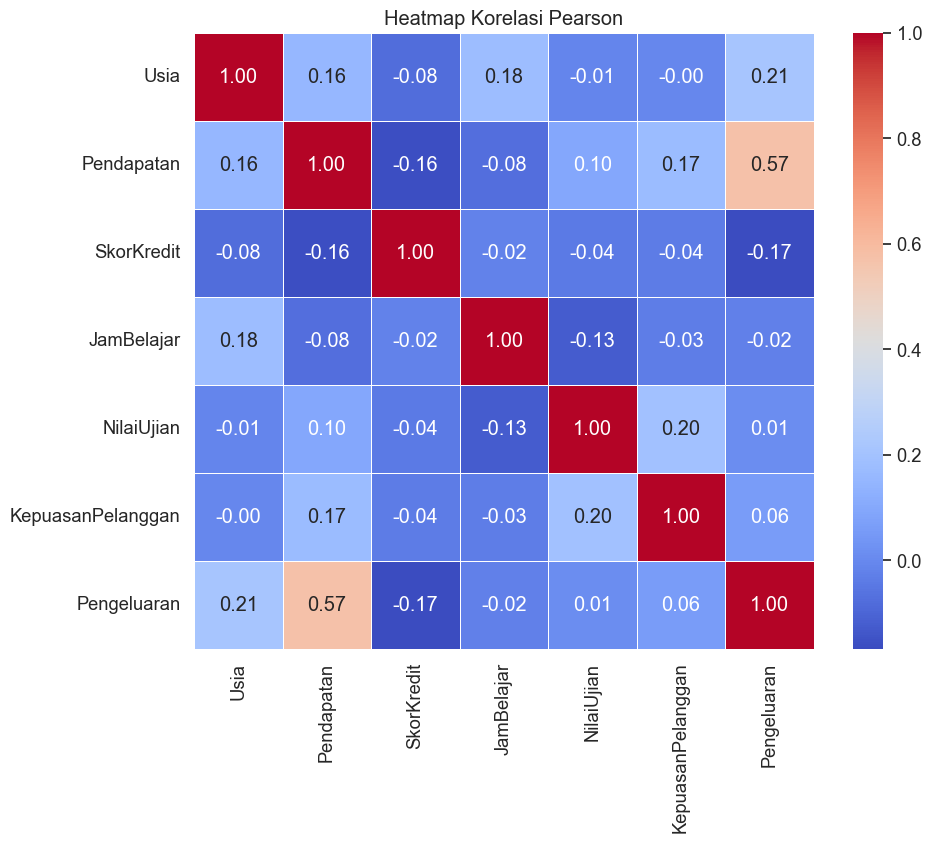

In [4]:
# Memilih variabel numerik untuk analisis korelasi
numerical_df = df.select_dtypes(include=np.number)

# Menghitung matriks korelasi Pearson
correlation_matrix_pearson = numerical_df.corr(method='pearson')

print("Matriks Korelasi Pearson:")
display(correlation_matrix_pearson)

# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi Pearson')
plt.show()

### 2.2 Matriks Korelasi Spearman

Matriks Korelasi Spearman:


,Usia,Pendapatan,SkorKredit,JamBelajar,NilaiUjian,KepuasanPelanggan,Pengeluaran
Usia,1.000000,0.151401,-0.086358,0.183013,-0.010286,-0.000101,0.205715
Pendapatan,0.151401,1.000000,-0.126106,-0.112403,0.088944,0.217624,0.596892
SkorKredit,-0.086358,-0.126106,1.000000,-0.013616,-0.055249,-0.019375,-0.228792
JamBelajar,0.183013,-0.112403,-0.013616,1.000000,-0.128498,-0.047567,-0.050873
NilaiUjian,-0.010286,0.088944,-0.055249,-0.128498,1.000000,0.208932,-0.002028
KepuasanPelanggan,-0.000101,0.217624,-0.019375,-0.047567,0.208932,1.000000,0.109094
Pengeluaran,0.205715,0.596892,-0.228792,-0.050873,-0.002028,0.109094,1.000000


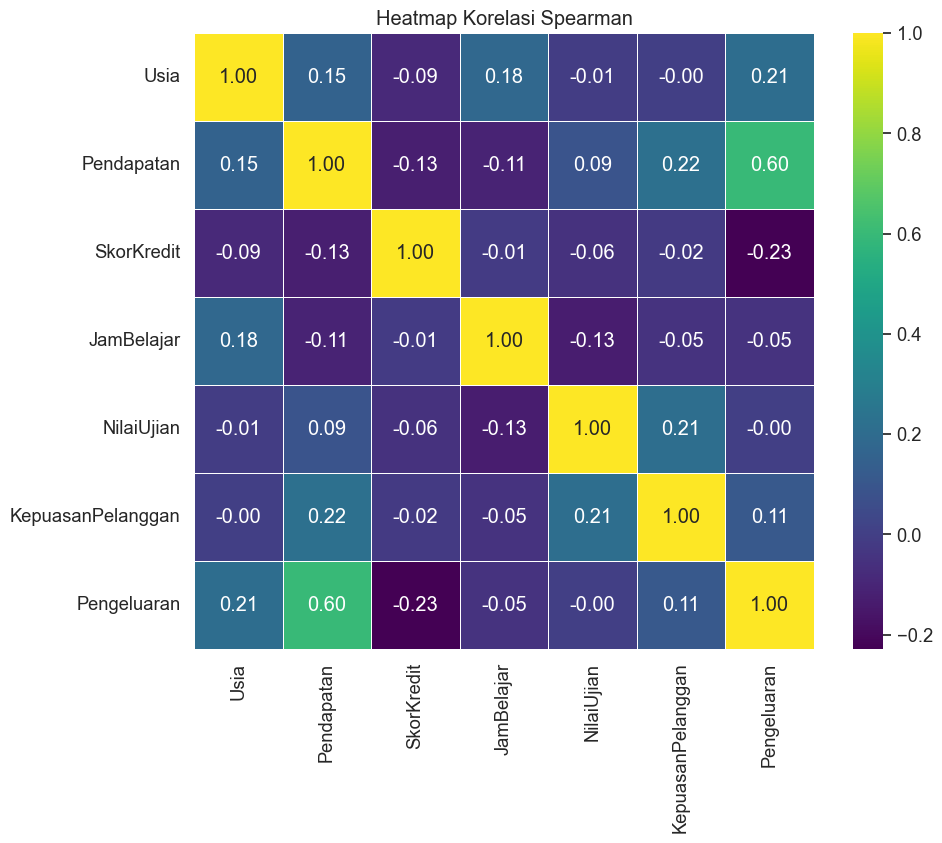

In [5]:
# Menghitung matriks korelasi Spearman
correlation_matrix_spearman = numerical_df.corr(method='spearman')

print("Matriks Korelasi Spearman:")
display(correlation_matrix_spearman)

# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='viridis', fmt='.2f', linewidths=.5)
plt.title('Heatmap Korelasi Spearman')
plt.show()

### 2.3 Uji Signifikansi Korelasi (Contoh)

In [6]:
# Contoh uji signifikansi untuk korelasi Pearson antara Pendapatan dan Pengeluaran
corr_pendapatan_pengeluaran, p_value_pendapatan_pengeluaran = pearsonr(df['Pendapatan'], df['Pengeluaran'])
print(f"Korelasi Pearson antara Pendapatan dan Pengeluaran: {corr_pendapatan_pengeluaran:.2f}")
print(f"P-value: {p_value_pendapatan_pengeluaran:.4f}")

if p_value_pendapatan_pengeluaran < 0.05:
    print("Korelasi signifikan secara statistik (alpha=0.05)")
else:
    print("Korelasi tidak signifikan secara statistik (alpha=0.05)")

# Contoh uji signifikansi untuk korelasi Spearman antara JamBelajar dan NilaiUjian
corr_jam_nilai, p_value_jam_nilai = spearmanr(df['JamBelajar'], df['NilaiUjian'])
print(f"Korelasi Spearman antara Jam Belajar dan Nilai Ujian: {corr_jam_nilai:.2f}")
print(f"P-value: {p_value_jam_nilai:.4f}")

if p_value_jam_nilai < 0.05:
    print("Korelasi signifikan secara statistik (alpha=0.05)")
else:
    print("Korelasi tidak signifikan secara statistik (alpha=0.05)")

Korelasi Pearson antara Pendapatan dan Pengeluaran: 0.57
P-value: 0.0000
Korelasi signifikan secara statistik (alpha=0.05)
Korelasi Spearman antara Jam Belajar dan Nilai Ujian: -0.13
P-value: 0.2026
Korelasi tidak signifikan secara statistik (alpha=0.05)


## 3. Visualisasi Lanjutan

### 3.1 Pair Plot

<Figure size 1200x1000 with 0 Axes>

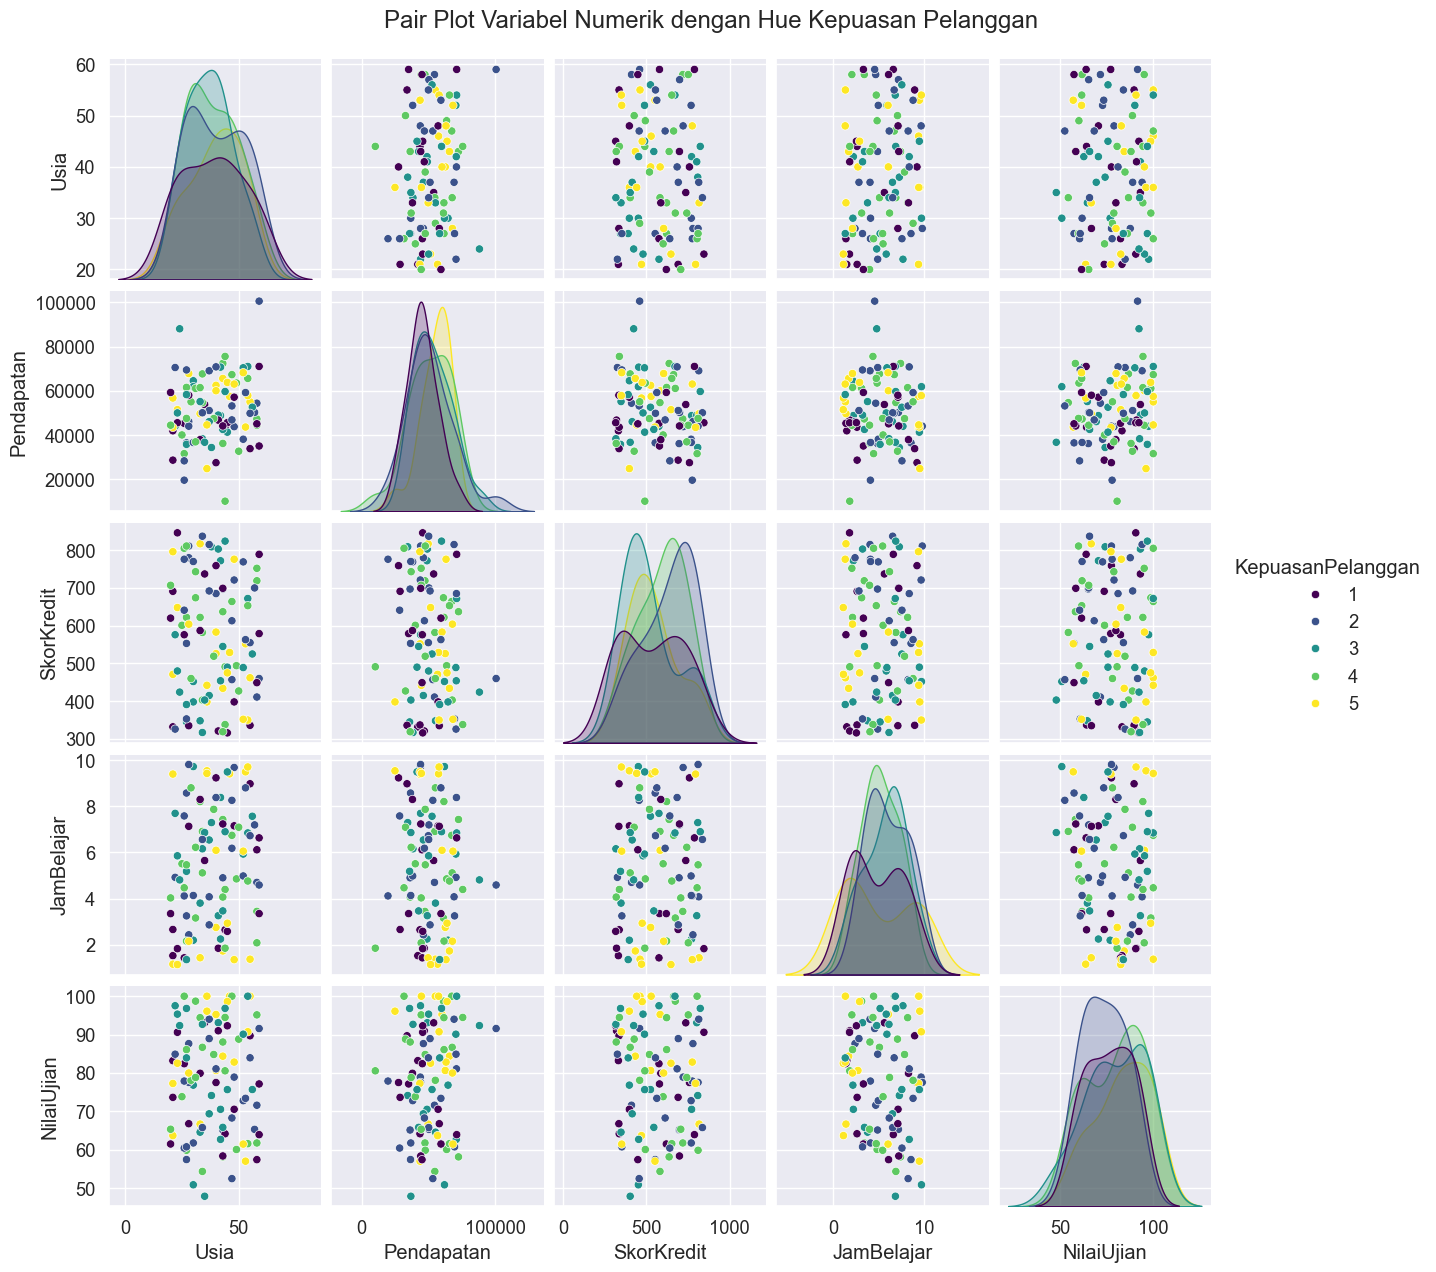

In [7]:
# Pair plot untuk melihat hubungan antar beberapa variabel numerik
# Kita bisa menambahkan variabel kategorikal sebagai hue
plt.figure(figsize=(12, 10))
sns.pairplot(df[['Usia', 'Pendapatan', 'SkorKredit', 'JamBelajar', 'NilaiUjian', 'KepuasanPelanggan']], diag_kind='kde', hue='KepuasanPelanggan', palette='viridis')
plt.suptitle('Pair Plot Variabel Numerik dengan Hue Kepuasan Pelanggan', y=1.02)
plt.show()

### 3.2 Scatter Plot dengan Regresi Linear

<Figure size 1000x600 with 0 Axes>

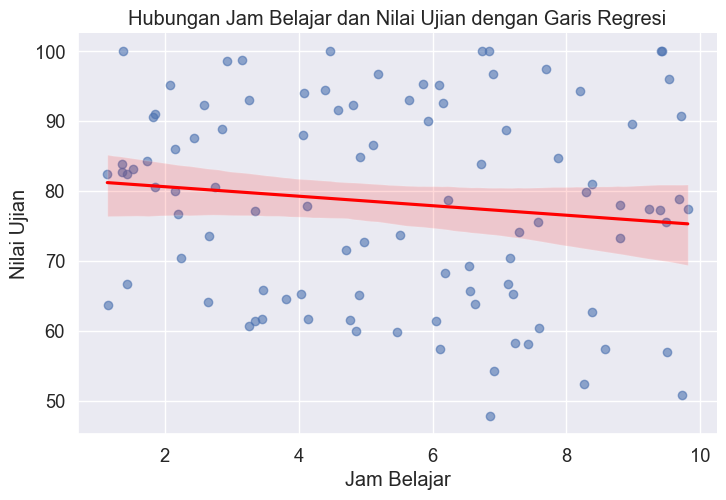

<Figure size 1000x600 with 0 Axes>

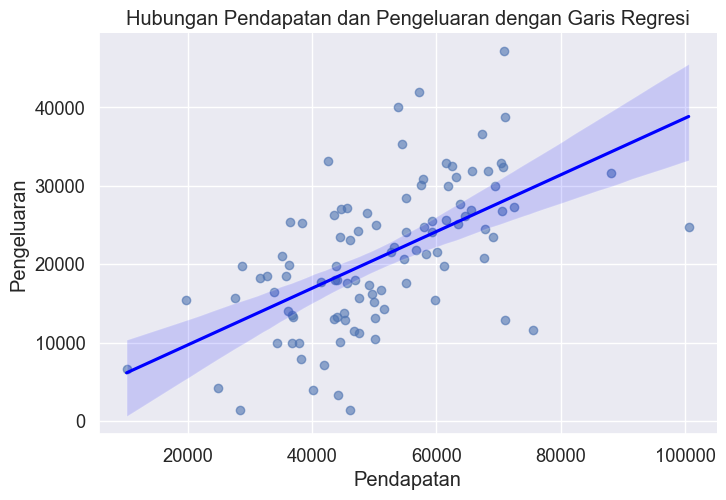

In [8]:
# Scatter plot dengan garis regresi untuk melihat tren
plt.figure(figsize=(10, 6))
sns.lmplot(x='JamBelajar', y='NilaiUjian', data=df, aspect=1.5, line_kws={'color': 'red'}, scatter_kws={'alpha':0.6})
plt.title('Hubungan Jam Belajar dan Nilai Ujian dengan Garis Regresi')
plt.xlabel('Jam Belajar')
plt.ylabel('Nilai Ujian')
plt.show()

plt.figure(figsize=(10, 6))
sns.lmplot(x='Pendapatan', y='Pengeluaran', data=df, aspect=1.5, line_kws={'color': 'blue'}, scatter_kws={'alpha':0.6})
plt.title('Hubungan Pendapatan dan Pengeluaran dengan Garis Regresi')
plt.xlabel('Pendapatan')
plt.ylabel('Pengeluaran')
plt.show()

### 3.3 Joint Plot

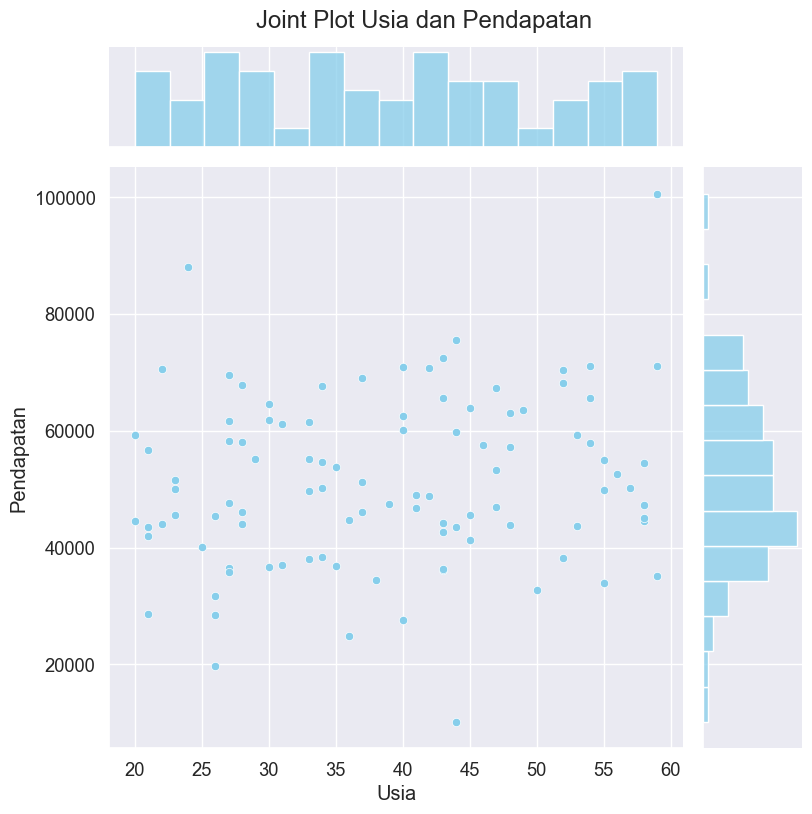

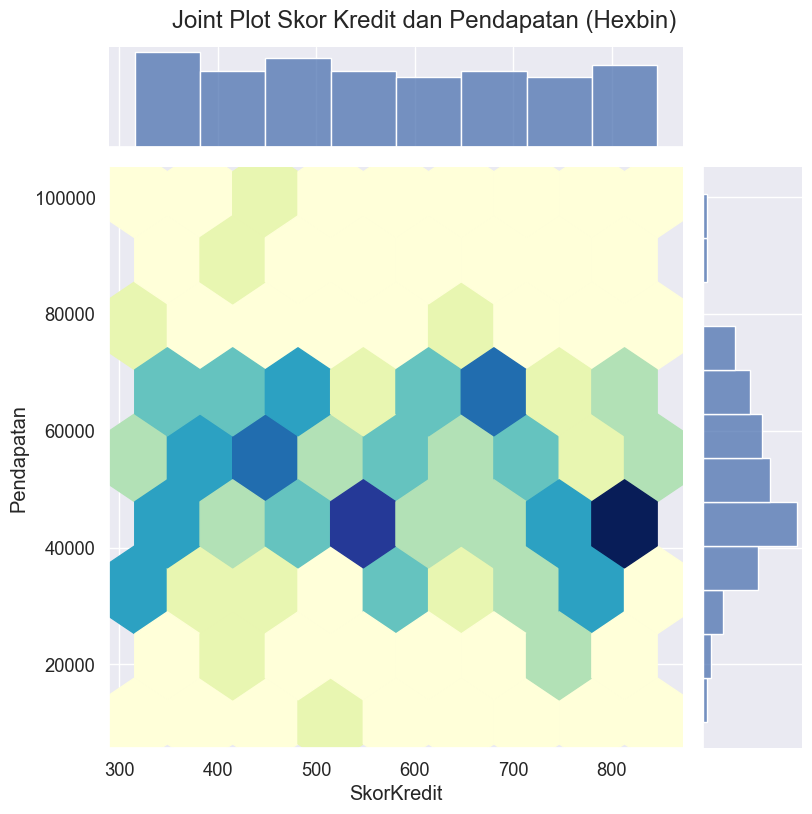

In [9]:
# Joint plot untuk melihat distribusi bivariat dan univariat secara bersamaan
sns.jointplot(x='Usia', y='Pendapatan', data=df, kind='scatter', color='skyblue', height=8, marginal_kws=dict(bins=15, fill=True))
plt.suptitle('Joint Plot Usia dan Pendapatan', y=1.02)
plt.show()

sns.jointplot(x='SkorKredit', y='Pendapatan', data=df, kind='hex', cmap='YlGnBu', height=8)
plt.suptitle('Joint Plot Skor Kredit dan Pendapatan (Hexbin)', y=1.02)
plt.show()

### 3.4 Visualisasi Kategorikal Lanjutan

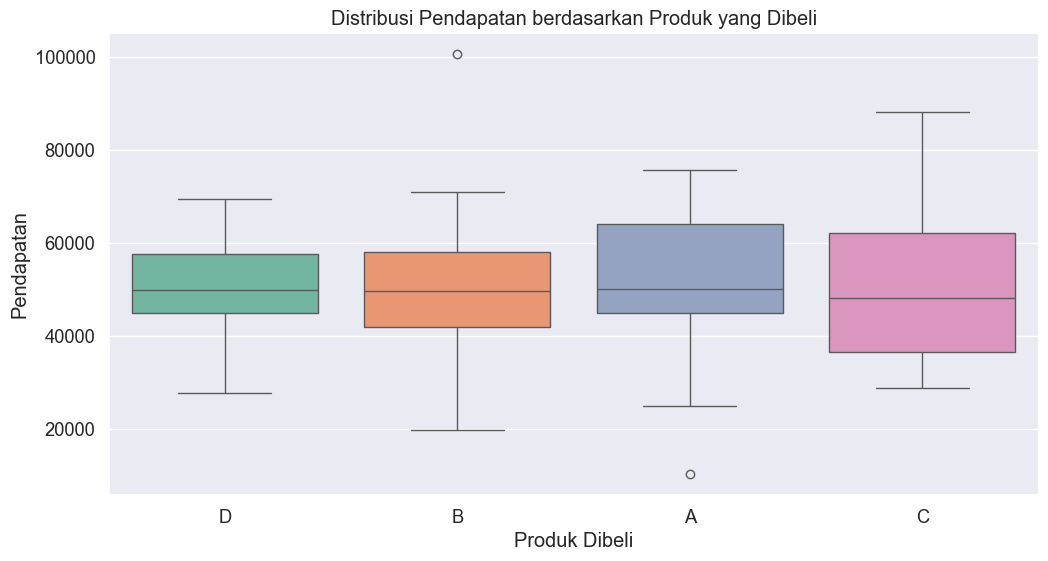

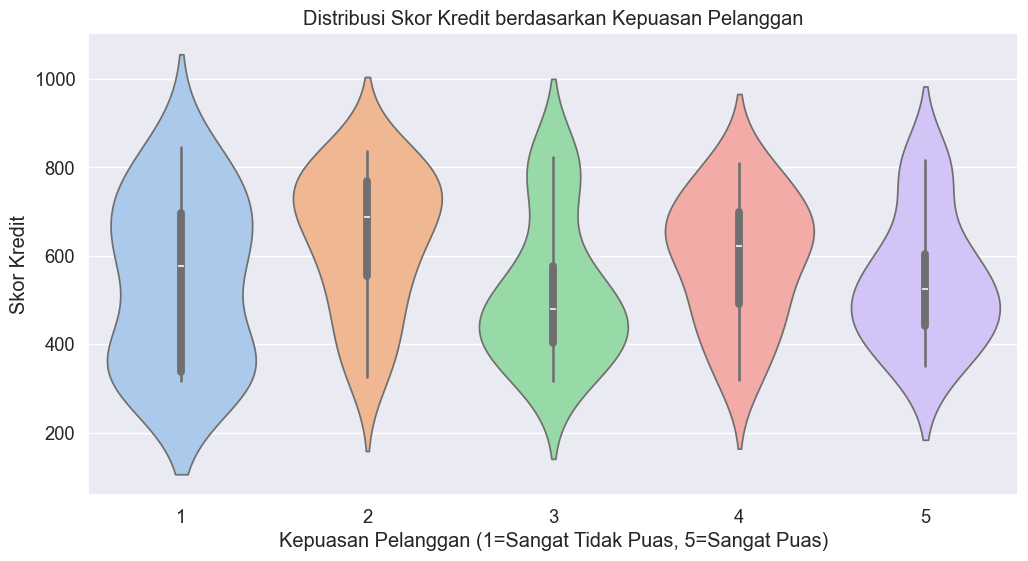

In [10]:
# Box plot atau Violin plot untuk melihat distribusi variabel numerik berdasarkan kategori
plt.figure(figsize=(12, 6))
sns.boxplot(x='ProdukDibeli', y='Pendapatan', data=df, palette='Set2')
plt.title('Distribusi Pendapatan berdasarkan Produk yang Dibeli')
plt.xlabel('Produk Dibeli')
plt.ylabel('Pendapatan')
plt.show()

plt.figure(figsize=(12, 6))
sns.violinplot(x='KepuasanPelanggan', y='SkorKredit', data=df, palette='pastel')
plt.title('Distribusi Skor Kredit berdasarkan Kepuasan Pelanggan')
plt.xlabel('Kepuasan Pelanggan (1=Sangat Tidak Puas, 5=Sangat Puas)')
plt.ylabel('Skor Kredit')
plt.show()

### 3.5 Bubble Chart (Scatter Plot dengan Ukuran)

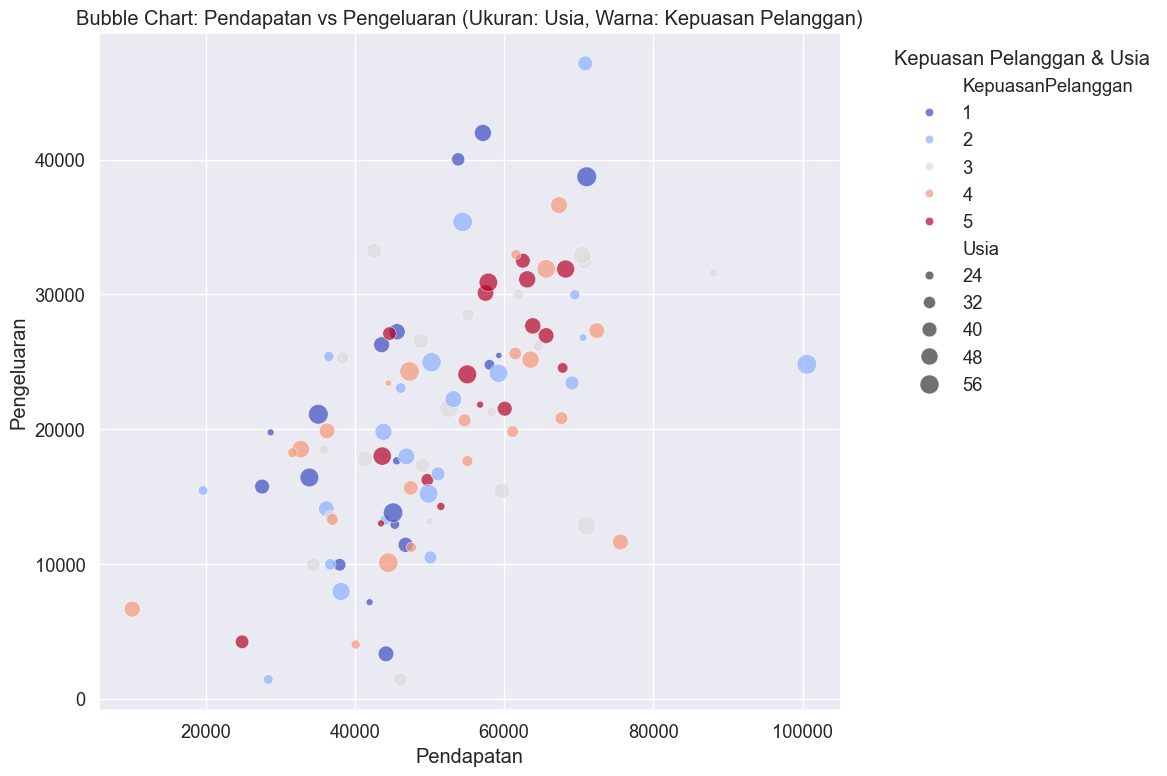

In [11]:
# Bubble chart: Scatter plot di mana ukuran titik merepresentasikan variabel ketiga
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Pendapatan', y='Pengeluaran', size='Usia', hue='KepuasanPelanggan', sizes=(20, 200), palette='coolwarm', alpha=0.7)
plt.title('Bubble Chart: Pendapatan vs Pengeluaran (Ukuran: Usia, Warna: Kepuasan Pelanggan)')
plt.xlabel('Pendapatan')
plt.ylabel('Pengeluaran')
plt.legend(title='Kepuasan Pelanggan & Usia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## 4. Kesimpulan

Dalam notebook ini, kita telah menjelajahi berbagai metode untuk menganalisis korelasi antar variabel dan teknik visualisasi data lanjutan.

**Analisis Korelasi:**
- **Matriks Korelasi Pearson**: Mengukur hubungan linear antara variabel numerik.
- **Matriks Korelasi Spearman**: Mengukur hubungan monotonik antara variabel numerik, baik linear maupun non-linear.
- **Uji Signifikansi**: Memastikan apakah korelasi yang diamati signifikan secara statistik atau hanya kebetulan.

**Visualisasi Lanjutan:**
- **Pair Plot**: Memberikan gambaran umum hubungan antar pasangan variabel numerik, seringkali dengan variabel kategorikal sebagai pembeda (hue).
- **Scatter Plot dengan Regresi Linear (lmplot)**: Menunjukkan tren hubungan antara dua variabel numerik.
- **Joint Plot**: Menggabungkan scatter plot (atau hexbin/KDE plot) dengan histogram/KDE plot univariat untuk masing-masing variabel.
- **Visualisasi Kategorikal (Box Plot, Violin Plot)**: Membantu memahami distribusi variabel numerik di berbagai kategori.
- **Bubble Chart**: Memungkinkan visualisasi tiga variabel numerik secara bersamaan (x, y, dan ukuran titik), seringkali dengan variabel keempat sebagai warna.

Teknik-teknik ini sangat berguna dalam tahap eksplorasi data untuk mengungkap pola, tren, dan hubungan yang mungkin tersembunyi dalam dataset, yang selanjutnya dapat menginformasikan analisis yang lebih mendalam atau pembuatan model.